<a href="https://colab.research.google.com/github/Prerana-Bijekar/DL/blob/main/Practical-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, size=X.shape)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 2: Function to fit polynomial regression
def polynomial_regression(degree, X_train, y_train, X_test, y_test):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  y_train_pred = model.predict(X_train_poly)
  y_test_pred = model.predict(X_test_poly)

  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)

  return model, poly, train_error, test_error, y_train_pred, y_test_pred

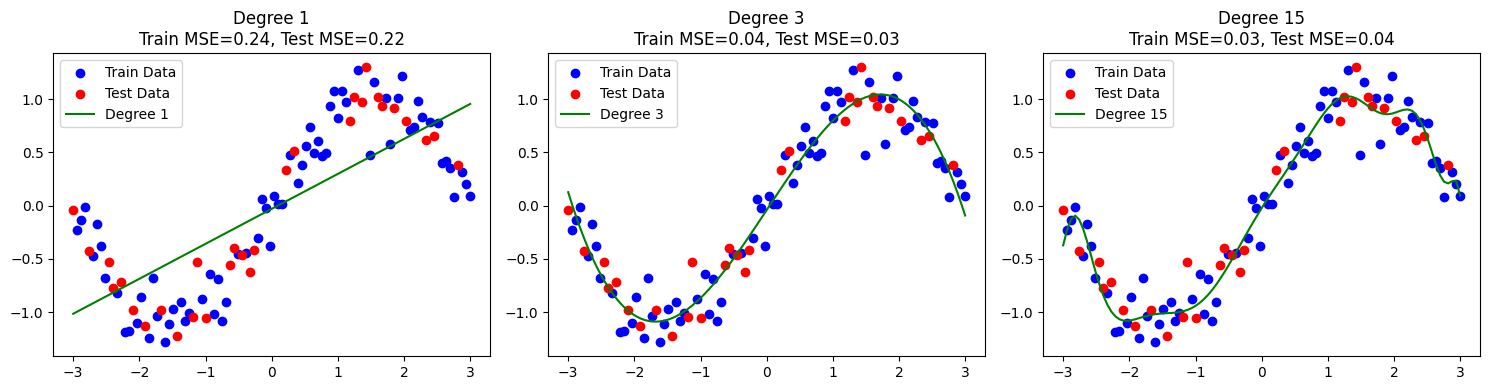

In [ ]:
# Step 3: Test different degrees
degrees = [1, 3, 15]
plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees):
  model, poly, train_error, test_error, y_train_pred, y_test_pred = polynomial_regression(
  d, X_train, y_train, X_test, y_test
  )

  # Plot predictions
  X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
  y_plot = model.predict(poly.transform(X_plot))

  plt.subplot(1, 3, i + 1)
  plt.scatter(X_train, y_train, color="blue", label="Train Data")
  plt.scatter(X_test, y_test, color="red", label="Test Data")
  plt.plot(X_plot, y_plot, color="green", label=f"Degree {d}")
  plt.title(f"Degree {d}\nTrain MSE={train_error:.2f}, Test MSE={test_error:.2f}")
  plt.legend()

plt.tight_layout()
plt.show()